# Inteligencia Artificial 2022/23
## Belén Díaz Agudo -  Facultad de Informática UCM
## Búsqueda local
En esta primera parte usaremos ejercicios paso a paso para familiarizarnos con la resolución de problemas sencillos de optimización, problemas conocidos que vamos a resolver utilizando algoritmos de búsqueda local. 
En la segunda parte de la práctica se pide resolver el problema dado en el enunciado.

## Algoritmo de escalada
Hill Climbing es un algoritmo de búsqueda local heurística utilizada para problemas de optimización.
Esta solución puede o no ser el óptimo global. El algoritmo es una variante del algoritmo de generación y prueba.
<br>
En general, el algoritmo funciona de la siguiente manera:
- Evaluar el estado inicial.
- Si es igual al estado del objetivo, terminamos.
- Encuentra un estado vecino al estado actual
- Evaluar este estado. Si está más cerca del estado objetivo que antes, reemplace el estado inicial con este estado y repita estos pasos.
<br>
Usaremos la implementación de AIMA que está en el módulo search.py

    def hill_climbing(problem):
        """From the initial node, keep choosing the neighbor with highest value,
        stopping when no neighbor is better. [Figure 4.2]"""
        current = Node(problem.initial)
        while True:
            neighbors = current.expand(problem)
            if not neighbors:
                break
            neighbor = argmax_random_tie(neighbors,
                                     key=lambda node: problem.value(node.state))
            if problem.value(neighbor.state) <= problem.value(current.state):
                break
            current = neighbor
        return current.state


In [1]:
initial = (0, 0)
grid = [[3, 7, 2, 8], [5, 2, 9, 1], [5, 3, 3, 16]]
from search import *

In [2]:
# Pre-defined actions for PeakFindingProblem
directions4 = { 'W':(-1, 0), 'N':(0, 1), 'E':(1, 0), 'S':(0, -1) }
directions8 = dict(directions4) 
directions8.update({'NW':(-1, 1), 'NE':(1, 1), 'SE':(1, -1), 'SW':(-1, -1) })

class PeakFindingProblem(Problem):
    """Problem of finding the highest peak in a limited grid"""

    def __init__(self, initial, grid, defined_actions=directions4):
        """The grid is a 2 dimensional array/list whose state is specified by tuple of indices"""
        Problem.__init__(self, initial)
        self.grid = grid
        self.defined_actions = defined_actions
        self.n = len(grid)
        assert self.n > 0
        self.m = len(grid[0])
        assert self.m > 0

    def actions(self, state):
        """Returns the list of actions which are allowed to be taken from the given state"""
        allowed_actions = []
        for action in self.defined_actions:
            next_state = vector_add(state, self.defined_actions[action])
            if next_state[0] >= 0 and next_state[1] >= 0 and next_state[0] <= self.n - 1 and next_state[1] <= self.m - 1:
                allowed_actions.append(action)

        return allowed_actions

    def result(self, state, action):
        """Moves in the direction specified by action"""
        return vector_add(state, self.defined_actions[action])

    def value(self, state):
        """Value of a state is the value it is the index to"""
        x, y = state
        assert 0 <= x < self.n
        assert 0 <= y < self.m
        return self.grid[x][y]


In [3]:
problem = PeakFindingProblem(initial, grid, directions4)

In [4]:
def hill_climbing(problem):
    """From the initial node, keep choosing the neighbor with highest value,
    stopping when no neighbor is better. [Figure 4.2]"""
    current = Node(problem.initial)
    while True:
        neighbors = current.expand(problem)
        if not neighbors:
            break
        neighbor = argmax_random_tie(neighbors,
                                     key=lambda node: problem.value(node.state))
        if problem.value(neighbor.state) <= problem.value(current.state):
            break
        current = neighbor
    return current.state

In [5]:
solution = problem.value(hill_climbing(problem))
solution

7

In [6]:
#Probamos tambien con directions 8 para comprobar que se alcanza el vecino con valor máximo 16 en el sureste (16 es vecino de 9 que es vecino de 7 con directions8)
problem1 = PeakFindingProblem(initial, grid, directions8)
problem.value(hill_climbing(problem1))

16

# Enfriamiento simulado ( simulated annealing) 
El algoritmo de enfriamiento simulado puede manejar las situaciones de óptimo local o mesetas típicas en algoritmos de escalada.
<br>
El enfriamiento simulado es bastante similar a la escalada pero en lugar de elegir el mejor movimiento en cada iteración, elige un movimiento aleatorio. Si este movimiento aleatorio nos acerca al óptimo global, será aceptado,
pero si no lo hace, el algoritmo puede aceptar o rechazar el movimiento en función de una probabilidad dictada por la temperatura.  Cuando la `temperatura` es alta, es más probable que el algoritmo acepte un movimiento aleatorio incluso si es malo. A bajas temperaturas, solo se aceptan buenos movimientos, con alguna excepción ocasional.
Esto permite la exploración del espacio de estado y evita que el algoritmo se atasque en el óptimo local.

    Usaremos la implementación de AIMA del modulo search.py
    
    def simulated_annealing(problem, schedule=exp_schedule()):
    """[Figure 4.5] CAUTION: This differs from the pseudocode as it
    returns a state instead of a Node."""
    current = Node(problem.initial)
    for t in range(sys.maxsize):
        T = schedule(t)
        if T == 0:
            return current.state
        neighbors = current.expand(problem)
        if not neighbors:
            return current.state
        next_choice = random.choice(neighbors)
        delta_e = problem.value(next_choice.state) - problem.value(current.state)
        if delta_e > 0 or probability(math.exp(delta_e / T)):
            current = next_choice

Como hemos visto en clase hay varios métodos de enfriamiento (scheduling routine) Se puede variar el método de enfriamiento. En la implementación actual estamos usando el método de enfriamiento exponencial (que se pasa como parámetro).

    def exp_schedule(k=20, lam=0.005, limit=100):
        """One possible schedule function for simulated annealing"""
        return lambda t: (k * math.exp(-lam * t) if t < limit else 0)

In [7]:
#Resolvemos el problema del máximo en una rejilla con enfriamiento simulado

solutions = {problem.value(simulated_annealing(problem)) for i in range(100)}
max(solutions)

16

Con el enfriamento simulado alcanzamos la solución óptima incluso para el caso en el que solo tenemos 4 direcciones ya que las elecciones aleatorias nos permiten llegar al 16 y no quedarnos en el máximo local 7.

### Ejercicio 1.  Resuelve el problema anterior de encontrar el punto máximo en una rejilla. Comenta brevemente  los resultados obtenidos en distintas rejillas con el algoritmo de escalada por máxima pendiente y enfriamiento simulado. 
Observa las características de la rejilla y la posición del máximo. 
Ejemplo de rejilla para pruebas en el que el máximo es 11.2 (lo usamos para calcular el % de éxitos)


In [8]:
import random
grid = [[0.00, 1.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [1.00, 1.80, 1.90, 1.90, 1.80, 1.70, 1.60, 1.50, 0.00],
        [0.00, 1.90, 1.95, 0.40, 0.40, 0.00, 1.65, 0.00, 0.00],
        [0.00, 0.00, 0.00, 2.00, 0.00, 0.00, 2.00, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 3.00, 0.00, 3.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 6.50, 4.30, 7.00, 0.70, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 7.00, 11.2, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 0.00, 9.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 6.50, 4.30, 1.80, 0.70, 0.00, 0.00],
        [0.00, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 8.50, 4.30, 1.80, 0.70, 0.00, 0.00]]
veces_optimo=0
for i in range(12):
    for j in range(9):
        initial = (i, j)
        problem = PeakFindingProblem(initial, grid, directions4)
        #solution = problem.value(hill_climbing(problem))
        solutions = {problem.value(simulated_annealing(problem)) for i in range(100)}
        solution=max(solutions)
        if solution==11.2:
            veces_optimo+=1
print(f"{veces_optimo*100/(9*12)}%")

89.81481481481481%


RESULTADOS: Esta rejilla es mala porque la cima (11.2) se halla en un valle rodeado de valores no muy buenos por lo que el enfriamiento simulado no siempre llegará por allí.

-Hill Climbing: 50.0%. De forma determinista, para la mitad de los puntos iniciales hay un camino de direcciones de nos lleva hasta el 11.2. Con sólo 4 direcciones, este valor se reduce bastante (hasta el 7%) ya que baja el número de vecinos de cada punto.

-Enfriamiento Simulado: En 3 ejecuciones: 94,4%, 90% y 87% de veces se alcanza el óptimo. Esto se debe a lo que hemos explicado de la rejilla previamente.

##  Algoritmos genéticos


Se define una clase ProblemaGenetico que incluye los elementos necesarios para la representación de un problema de optimización que se va a resolver con un algoritmo genético. Los elementos son los que hemos visto en clase:

 - genes: lista de genes usados en el genotipo de los estados.
 - longitud_individuos: longitud de los cromosomas
 - decodifica: función de obtiene el fenotipo a partir del genotipo.
 - fitness: función de valoración.
 - muta: función de mutación de un cromosoma 
 - cruza: función de cruce de un par de cromosomas

In [9]:
import random

In [10]:
class ProblemaGenetico(object):
        def __init__(self, genes,fun_dec,fun_muta , fun_cruza, fun_fitness,longitud_individuos):
            self.genes = genes
            self.fun_dec = fun_dec
            self.fun_cruza = fun_cruza
            self.fun_muta = fun_muta
            self.fun_fitness = fun_fitness
            self.longitud_individuos = longitud_individuos
            """Constructor de la clase"""
                
        def decodifica(self, genotipo):
            """Devuelve el fenotipo a partir del genotipo"""
            fenotipo = self.fun_dec(genotipo)
            return fenotipo
        def muta(self, cromosoma,prob):
            """Devuelve el cromosoma mutado"""   
            mutante = self.fun_muta(cromosoma,prob)
            return mutante
        def cruza(self, cromosoma1, cromosoma2):         
            """Devuelve el cruce de un par de cromosomas"""
            cruce = self.fun_cruza(cromosoma1,cromosoma2)
            return cruce 
        def fitness(self, cromosoma):    
            """Función de valoración"""
            valoracion = self.fun_fitness(cromosoma)
            return valoracion

**Problema a resolver: encontrar el valor X que optimice una función**

En primer lugar vamos a definir una instancia de la clase anterior correspondiente al problema de optimizar (maximizar o minimizar) 
Vamos a usar como ejemplo trivial la función cuadrado x^2 en el conjunto de los números naturales menores que 2^{10}. 
Se usa este ejemplo trivial (del que sabemos la solución) para ver todos los elementos y poder observar el comportamiento del algoritmo genético.  Después deberás probar con otra función más compleja de tu elección. 


In [11]:
# Será necesaria la siguiente función que interpreta una lista de 0's y 1's como un número natural:  
# La siguiente función que interpreta una lista de 0's y 1's como
# un número natural:  

def binario_a_decimal(x):
    x=x[::-1]
    return sum(b*(2**i) for (i,b) in enumerate(x)) 

In [12]:
binario_a_decimal((1,1,1,0))

14

In [13]:
# En primer lugar usaremos la clase anterior para representar el problema de optimizar (maximizar o minimizar)
# la función cuadrado en el conjunto de los números naturales menores que
# 2^{10}. 

# Vamos a definir funciones de cruce, mutación y fitness para este problema.

def fun_cruzar(cromosoma1, cromosoma2):
    """Cruza los cromosomas por la mitad (podemos cambiar la función de cruce eligiendo otro punto de cruce al azar)"""
    l1 = len(cromosoma1)
    l2 = len(cromosoma2)
    cruce1 = cromosoma1[0:l1//2]+cromosoma2[l1//2:l2]
    cruce2 = cromosoma2[0:l2//2]+cromosoma1[l2//2:l1]
    return [cruce1,cruce2]

def fun_mutar(cromosoma,prob):
    """Elige un elemento al azar del cromosoma y lo modifica con una probabilidad igual a prob"""
    l = len(cromosoma)
    p = random.randint(0,l-1)
    if prob > random.uniform(0,1):
        cromosoma[p] =  (cromosoma[p]+1)%2
    return cromosoma

def fun_fitness_cuad(cromosoma):
    """Función de valoración que eleva al cuadrado el número recibido en binario"""
    n = binario_a_decimal(cromosoma)**2
    return n

cuadrados = ProblemaGenetico([0,1],binario_a_decimal,fun_mutar, fun_cruzar, fun_fitness_cuad,10)

Una vez definida la instancia cuadrados que representa el problema genético, probar alguna de las funciones definidas en la clase anterior, para esta instancia concreta. Por ejemplo:

In [14]:
cuadrados.decodifica([1,0,0,0,1,1,0,0,1,0,1])
# Salida esperada: 1125

1125

In [15]:
cuadrados.fitness([1,0,0,0,1,1,0,0,1,0,1])
# Salida esperada: 1265625

1265625

In [85]:
cuadrados.muta([1,0,0,0,1,1,0,0,1,0,1],0.1)
# Posible salida: [1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1]

[1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1]

In [86]:
cuadrados.muta([1,0,0,0,1,1,0,0,1,0,1],0.1)
# Posible salida: [0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1]

[1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1]

In [87]:
cuadrados.cruza([1,0,0,0,1,1,0,0,1,0,1],[0,1,1,0,1,0,0,1,1,1])
# Posible salida: [[1, 0, 0, 0, 1, 0, 0, 1, 1, 1], [0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1]]

[[1, 0, 0, 0, 1, 0, 0, 1, 1, 1], [0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1]]

Vamos a probar a optimizar la funcion |x^2* sin(x)| en los numeros naturales menores que 2^7 = 128. La función |x^2*sin(x)|  crece y decrece mucho muy rápido por culpa del seno. Según el análisis hecho en la calculadora gráfica de desmos que incluimos a continuación, el maximo debería dar 15687.55 en el punto x = 127 (teniendo en cuenta que lo hacemos solo sobre los naturales).

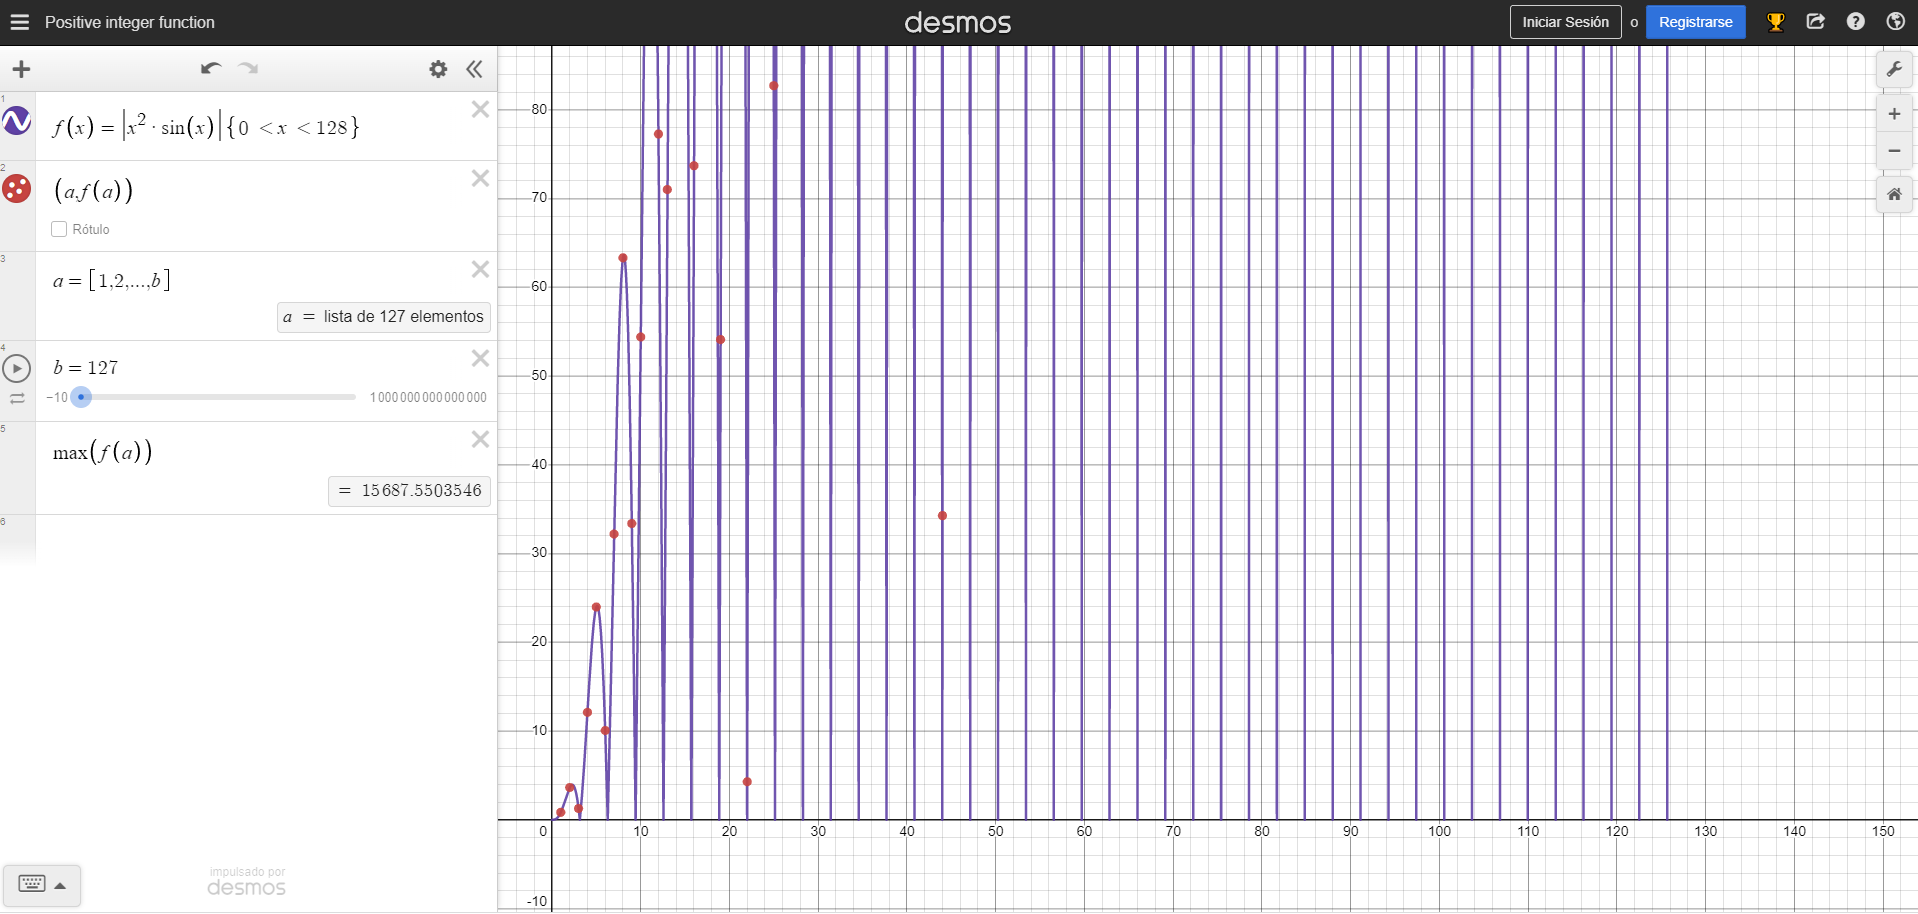

Escribimos la función fitness para nuestro problema. En este caso será, naturalmente, la función a maximizar/minimizar, que es f(x) = x^2*abs(sin(x)). Pasamos el número a decimal y lo pasamos por la función.

In [16]:
import math
def fun_fitness_cuadSin(cromosoma):
    """Función de valoración que eleva al cuadrado el número recibido en binario"""
    x = binario_a_decimal(cromosoma)
    n = abs(x**2 *math.sin(x))
    return n

In [17]:
fun_fitness_cuadSin((1,1,1,1,1,1,1)) #Probamos el fitness

15687.550354552799

In [18]:
cuadradoSeno = ProblemaGenetico([0,1],binario_a_decimal,fun_mutar, fun_cruzar, fun_fitness_cuadSin,7)

### Ejercicio 2

   - Os doy hecha una función poblacion_inicial(problema_genetico,tamaño), para definir una población inicial de un tamaño dado, para una instancia dada de la clase anterior ProblemaGenetico

sugerencia: usar random.choice

   - Os doy hecha una función de cruce que recibe una instancia de Problema_Genetico y una población de padres (supondremos que hay un número par de padres), obtiene la población resultante de cruzarlos de dos en dos (en el orden en que aparecen)

cruza_padres(problema_genetico,padres)

   - Definir la función de mutación que recibe una instancia de Problema_Genetico, una población y una probabilidad de mutación, obtiene la población resultante de aplicar operaciones de mutación a cada individuo llamando a la función muta definida para el problema genético.
muta_individuos(problema_genetico, poblacion, prob)

In [19]:
def poblacion_inicial(problema_genetico, size):
    l=[] # población inicial
    for i in range(size): # añadimos a la población size individuos
        x=[]
        for j in range(problema_genetico.longitud_individuos): # los individuos se generan eligiendo sus genes
                                                               # de manera eleatoria de entre los genes posibles
            x.append(random.choice(problema_genetico.genes))
        l.append(x) 
    return l

In [20]:
poblacion_inicial(cuadrados,10)

[[1, 0, 0, 0, 1, 1, 1, 0, 0, 0],
 [0, 1, 0, 1, 1, 1, 1, 0, 0, 1],
 [0, 1, 1, 1, 0, 1, 0, 1, 1, 0],
 [1, 1, 0, 0, 1, 1, 1, 0, 0, 0],
 [0, 1, 0, 0, 1, 1, 0, 0, 0, 0],
 [1, 1, 0, 1, 1, 1, 0, 1, 0, 0],
 [1, 1, 1, 0, 1, 0, 1, 1, 1, 0],
 [0, 1, 1, 0, 1, 1, 1, 0, 0, 1],
 [1, 0, 0, 1, 1, 1, 0, 0, 0, 1],
 [0, 1, 0, 1, 0, 1, 0, 1, 0, 0]]

In [96]:
def cruza_padres(problema_genetico,padres):
    l = []
    for i in range(len(padres)//2):# asumimos que la población de la que partimos tiene tamaño par
        desc = problema_genetico.fun_cruza(padres[2*i],padres[2*i+1]) # El cruce se realiza con la función de cruce  
                                                                     # proporcionada por el propio problema genético
        l.append(desc[0]) # La población resultante se obtiene de cruzar el padre[0] con padre[1], padre[2] con padre[3]...
        l.append(desc[1]) # y añadir cada par de descendientes a la nueva población
    return l

In [97]:
p1 = [[1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
      [0, 1, 0, 1, 0, 0, 1, 0, 1, 1],
      [0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
      [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
      [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
      [1, 0, 1, 1, 1, 0, 1, 1, 0, 1]]

cruza_padres(cuadrados,p1)
# Posible salida
# [[1, 1, 0, 1, 0, 0, 1, 0, 1, 1],
#  [0, 1, 0, 1, 0, 1, 0, 0, 0, 1],
#  [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
#  [0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
#  [0, 1, 1, 1, 1, 0, 1, 1, 0, 1],
#  [1, 0, 1, 0, 0, 0, 0, 0, 0, 0]]

[[1, 1, 0, 1, 0, 0, 1, 0, 1, 1],
 [0, 1, 0, 1, 0, 1, 0, 0, 0, 1],
 [0, 0, 1, 0, 0, 1, 1, 1, 1, 0],
 [0, 0, 1, 1, 1, 0, 1, 1, 1, 0],
 [0, 1, 1, 0, 0, 0, 1, 1, 0, 1],
 [1, 0, 1, 1, 1, 0, 0, 0, 0, 0]]

In [102]:
def muta_individuos(problema_genetico, poblacion, prob):
    l = []
    for individuo in poblacion:
        mutado = problema_genetico.muta(individuo,prob)
        l.append(mutado)
    return l
    # IMPLEMENTA TU ESTA FUNCIÓN. 
    # hay que llamar a  problema_genetico.muta(x,prob) para todos los individuos de la poblacion.

In [103]:
muta_individuos(cuadrados,p1,0.5)
# Posible salida:
#  [[1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
#   [0, 1, 0, 1, 0, 0, 1, 0, 0, 1],
#   [0, 0, 1, 0, 0, 0, 1, 0, 1, 0],
#   [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
#   [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
#   [1, 0, 1, 1, 1, 0, 1, 1, 0, 1]]

[[1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
 [1, 1, 0, 1, 0, 0, 1, 0, 1, 1],
 [0, 0, 1, 0, 1, 0, 1, 1, 1, 0],
 [1, 0, 0, 1, 1, 1, 1, 1, 1, 0],
 [1, 1, 1, 0, 0, 1, 0, 0, 0, 0],
 [1, 0, 1, 1, 1, 1, 1, 1, 0, 1]]

In [104]:
p1 = [[1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
      [0, 1, 0, 1, 0, 0, 1, 0, 1, 1],
      [0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
      [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
      [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
      [1, 0, 1, 1, 1, 0, 1, 1, 0, 1]]

In [105]:
muta_individuos(cuadrados,p1,0.5)

[[1, 1, 0, 0, 0, 1, 0, 0, 0, 1],
 [0, 1, 0, 1, 0, 0, 1, 0, 1, 1],
 [0, 0, 1, 0, 1, 0, 1, 1, 1, 0],
 [0, 0, 1, 1, 1, 0, 1, 1, 1, 0],
 [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 1, 1, 0, 1, 1, 0, 1]]

Vamos a definir una función de selección mediante torneo de n individuos de una población.  
La función recibe como entrada:
 - una instancia de la clase ProblemaGenetico
 - una población
 - el número n de individuos que vamos a seleccionar
 - el número k de participantes en el torneo
 - un valor opt que puede ser o la función max o la función min (dependiendo de si el problema es de maximización o de minimización, resp.).

seleccion\_por\_torneo(problema_genetico,poblacion,n,k,opt) 

Usar random.sample para seleccionar k elementos de una secuencia. 
Por ejemplo, random.sample(population=[2,5,7,8,9], k=3) devuelve [7,5,8]. 

In [106]:
def seleccion_por_torneo(problema_genetico, poblacion, n, k, opt):
    """Selección por torneo de n individuos de una población. Siendo k el nº de participantes
        y opt la función max o min."""
    seleccionados = []
    for i in range(n):
        participantes = random.sample(poblacion,k)
        seleccionado = opt(participantes, key=problema_genetico.fitness)
        opt(poblacion, key=problema_genetico.fitness)
        seleccionados.append(seleccionado)
        # poblacion.remove(seleccionado)
    return seleccionados  

In [107]:
#Ejemplo
seleccion_por_torneo(cuadrados, poblacion_inicial(cuadrados,8),3,6,max)
# Posible salida: [[1, 1, 1, 1, 1, 0, 0, 0, 1, 1], [1, 0, 0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 1, 1, 0, 1, 1, 1, 0, 1]]


[[1, 1, 1, 1, 0, 0, 1, 1, 0, 1],
 [1, 1, 1, 1, 0, 0, 1, 1, 0, 1],
 [1, 1, 1, 1, 0, 0, 1, 1, 0, 1]]

In [108]:
seleccion_por_torneo(cuadrados, poblacion_inicial(cuadrados,8),3,6,min)
# [[0, 0, 1, 1, 0, 1, 1, 0, 0, 0], [1, 0, 1, 0, 1, 1, 1, 0, 0, 0], [1, 1, 0, 1, 0, 0, 1, 0, 1, 0]]

[[0, 0, 0, 1, 1, 1, 1, 0, 1, 0],
 [0, 0, 0, 0, 1, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 1, 0, 1, 1, 0, 0]]

In [1]:
# La siguiente función implementa una posibilidad para el algoritmo genético completo: 
# inicializa t = 0 
# Generar y evaluar la Población P(t)
# Mientras no hemos llegado al número de generaciones fijado:  t < nGen
#    P1 = Selección por torneo de (1-size)·p individuos de P(t)
#    P2 = Selección por torneo de (size·p) individuos de P(t)
#    Aplicar cruce en la población P2
#    P4 = Union de P1 y P3
#    P(t+1) := Aplicar mutación P4 
#    Evalua la población P(t+1) 
#    t:= t+1
        
# Sus argumentos son:
# problema_genetico: una instancia de la clase ProblemaGenetico con la representación adecuada del problema de optimización 
# que se quiere resolver.
# k: número de participantes en los torneos de selección.
# opt: max ó min, dependiendo si el problema es de maximización o de minimización. 
# nGen: número de generaciones (que se usa como condición de terminación)
# size: número de individuos en cada generación
# prop_cruce: proporción del total de la población que serán padres. 
# prob_mutación: probabilidad de realizar una mutación de un gen.

def algoritmo_genetico(problema_genetico,k,opt,ngen,size,prop_cruces,prob_mutar):
    poblacion= poblacion_inicial(problema_genetico,size)
    n_padres=round(size*prop_cruces)
    n_padres= int (n_padres if n_padres%2==0 else n_padres-1)
    n_directos = size-n_padres
    for _ in range(ngen):
        poblacion= nueva_generacion(problema_genetico,k,opt,poblacion,n_padres, n_directos,prob_mutar)

    mejor_cr= opt(poblacion, key=problema_genetico.fitness)
    mejor=problema_genetico.decodifica(mejor_cr)
    return (mejor,problema_genetico.fitness(mejor_cr)) 


Necesitarás definir la función auxiliar nueva_generacion(problema_genetico,poblacion,n_padres,n_directos,prob_mutar) que dada una población calcula la siguiente generación.

In [2]:
#Definir la función nueva_generacion
def nueva_generacion(problema_genetico, k,opt, poblacion, n_padres, n_directos, prob_mutar):
    padres2 = seleccion_por_torneo(problema_genetico, poblacion, n_directos, k,opt) 
    padres1 = seleccion_por_torneo(problema_genetico, poblacion, n_padres , k, opt)
    cruces =  cruza_padres(problema_genetico,padres1)
    generacion = padres2+cruces
    resultado_mutaciones = muta_individuos(problema_genetico, generacion, prob_mutar)
    return resultado_mutaciones

### Ejercicio 3.  Ejecutar el algoritmo genético anterior, para resolver el problema anterior (tanto en minimización como en maximización) para la función cuadrado y para otra función. 

Se puede comenzar probarndo los resultados y comportamiento del algorimto para la función X^2 ya que sabemos la solución. 
Después hacer una valoración de resultados y comentarios sobre el comportamiento del algoritmmo para otra función. 
Puedes elegir cualquier otra función.
f(x) = |(x-12)/(2+sen(x)|  entre X=-5 y X=25

En la resolución del problema hay que tener en cuenta que el algoritmo genético devuelve un par con el mejor fenotipo encontrado y su valoración.

Se puede calcular el número de veces que el algoritmo alcanza la solución óptima modificando parámetros como:

-k=número de participantes del torneo
-ngen=número de generaciones
-size=tamaño de la población
-prob_cruce=probabilidad de cruce
-prob_mutacion=probabilidad de mutacion

Realizar pruebas para un número suficiente de ejecuciones para las cuales queremos estudiar cual es el porcentaje de optimalidad del algoritmo para los distintos parámetros y de ahí sacar conclusiones. Para determinar el número de veces que una solución es éxitosa se pueden considerar soluciones aproximadas, por ejemplo, que para el problema de minimización es exitosa si la solución es menor que 23 y para el problema de maximización una solución será exitosa si es mayor que 1000.

In [111]:
algoritmo_genetico(cuadrados,3,min,20,10,0.7,0.1)
# Salida esperada: (0, 0)

(0, 0)

In [114]:
algoritmo_genetico(cuadrados,3,max,20,10,0.7,0.1)
# Salida esperada: (1023, 1046529)

(1023, 1046529)

In [121]:
#Probamos nuestro problema con 20 generaciones: Ha alcanzado el máximo, pero no siempre.
algoritmo_genetico(cuadradoSeno,3,max,20,10,0.7,0.1)

(127, 15687.550354552799)

In [143]:
#Probamos el mismo problema para minimización: Salida esperada: (k*pi,0) que solo es entero si k = 0, por lo que en realidad esperamos (0,0)
# y otras veces (menos) devolverá 3 que es cercano al 3.14 donde también vale 0. Será muy raro que de valores cercanos a cualquier
# otro múltiplo de pi debido a que x^2 hace que cuanto más grande sea x, más lejos esté f(x) de 0 que es el mínimo real de la función.
algoritmo_genetico(cuadradoSeno,3,min,20,10,0.7,0.1)

(0, 0.0)

A continuación, incluimos celdas para hacer un análisis estadístico de la solución, contando cuántas veces se alcanza el óptimo y para valorar la efectividad media de la implementación. Esto es importante por si se quisiera usar en el mundo real, debemos saber cómo de cerca/lejos está la solución media arrojada por el algoritmo del verdadero óptimo. En nuestro caso, vemos que se alcanza el máximo en torno a un 25% de las veces (depende de la ejecución) y que, en estos casos, el valor medio de los puntos en los que se alcanza es 120(~ ~127) y el valor de los máximos 14193(que no se acerca tanto a 15687). Dependerá del contexto decidir si esta solucion es suficientemente buena para lo que se pretenda o no. Además, notar que, por la natureleza de la función elegida (aún siendo continua), aunque los valores de x sean aparentemente cercanos, los de f(x) diferirán en mayor medida. 

In [140]:
veces_optimo = 0
accX = 0
accM = 0
for i in range(100):
    sol = algoritmo_genetico(cuadradoSeno,3,max,20,10,0.7,0.1)
    accX+=sol[0]
    accM+=sol[1] 
    if (sol[0]==127):
        veces_optimo+=1
mediaX = accX/100
mediaM = accM/100
print(f"{veces_optimo}% se alcanza el maximo real que es (127, 15687.550354552799)")
print(f"Valor medio de los puntos en los que se alcanza el maximo devuelto {mediaX}")
print(f"Valor medio de los maximos devueltos {mediaM}")


23% se alcanza el maximo real que es (127, 15687.550354552799)
Valor medio de los puntos en los que se alcanza el maximo devuelto 120.28
Valor medio de los maximos devueltos 14193.140875040459


Lo mismo hacemos para el cálculo de los mínimos, pero observando mejores resultados por lo explicado anteriormente. La mayoría de las veces se alcanza el mínimo real y muchas de las otras se alcanza un valor cercano, ya que f(x) aún no ha 'crecido' lo suficiente.

In [142]:
veces_optimo = 0
accX = 0
accM = 0
for i in range(100):
    sol = algoritmo_genetico(cuadradoSeno,3,min,20,10,0.7,0.1)
    accX+=sol[0]
    accM+=sol[1] 
    if (sol[0]==0):#de los posibles valores de x en los que se alcanza el minimo (0), el único entero es x = 0
        veces_optimo+=1
mediaX = accX/100
mediaM = accM/100
print(f"{veces_optimo}% se alcanza el minimo real en programacion entera que es (0, 0)")
print(f"Valor medio de los puntos en los que se alcanza el minimo devuelto {mediaX}")
print(f"Valor medio de los minimos devueltos {mediaM}")


65% se alcanza el minimo real en programacion entera que es (0, 0)
Valor medio de los puntos en los que se alcanza el minimo devuelto 3.51
Valor medio de los minimos devueltos 2.9410525357678057


### Ejercicio 4 (opcional)
Resolver mediante una configuración de un algoritmo genético el problema de los Ocho Consecutivos que distribuye los números 1 
al 8 en las ocho casillas de la figura, con la condición de que no puede haber dos números consecutivos en casillas adyacentes. Se consideran casillas adyacentes aquéllas que comparten un lado o una esquina.

La siguiente configuración representa una solución al problema:
    
    2 6 8 5 
    7 4 1 4
    
Comenta el resultado y el rendimiento del algoritmo para distintos parámetros.   
    

### Ejercicio 5: RESOLUCION DE UN NONOGRAMA MEDIANTE UN ALGORITMO GENÉTICO

Procedemos a la implementación de un algoritmo genético para resolver Nonogramas. Comenzamos planteando las partes más importantes de dicho algoritmo: 

Representación del Nonograma: Optamos por usar una matriz NxN de 0's y 1's de modo que 0 representa que la casilla está en blanco y 1 representa que la casilla está coloreada.

-Representación de las restricciones: En este caso usamos una lista tridimensional. En la primera dimensión encontramos 2 elementos, la posición 0 representa las restricciones de las filas y la posición 1 la de las columnas. En la dimensión 2 encontramos N elementos de modo que el elemento de la posición i nos da las restricciones de la linea i (fila si estamos en 0 y columna si estamos en 1). Por último, con la tercera dimensión accedemos a los valores concretos de la restricción. Por ejemplo, para acceder a la restricción de la tercera fila del nonograma, usariamos Restricciones[0][3] y esto nos devolverá una lista, digamos [2 1] con las restricciones que buscabamos. 

-Función Fitness: Quizá esta función es el elemento tanto más importante como más complicado del algoritmo. Es por esto por lo que nos hemos visto obligados a probar diferentes funciones fitness hasta encontrar una que nos diera resultados lo suficientemente satisfactorios. A continuacion mostramos las 4 funciones que hemos pensado: 

   -Número de filas y columnas que satisfacen la totalidad de sus restricciones:En un primer momento, y sin mucho acierto como    comprobamos posteriormente, implementamos una función fitness que sumaba 1 por cada linea que cumpliera la totalidad de las    restricciones. Después, nos dimos cuenta de que esta función no es buena puesto que hay individuos que casi cumplen las        restricciones de todas sus lineas y por tanto son muy buenos, pues son realmente cercanos a la solución óptima, y sin          embargo tienen fitness 0 (pues realmente ninguna linea cumple al completo las restricciones). Esto hacía que estas              soluciones "casi óptimas" fueran descartadas y por tanto nos quedabamos sin buenos candidatos en nuestra población. Al fin y    al cabo, había muchisima aleatoriedad (pues todos los individuos eran prácticamente igual de susceptibles de ser                descartados) y se obtenían resultados nefastos (fitness de 4 sobre 17 en los mejores casos y tras muchas generaciones con      muchos individuos).
   
   -Número de subrestricciones que se satisfacen: Una subrestricción es uno de los numeros que tienen las restricciones de        lineas en su lista. Por ejemplo, las subrestricciones de la resticción [1,2] son 1 y 2. Para acabar con el problema            anterior, implementamos esta función fitness. Ahora, si un individuo tiene sus  lineas muy cerca de cumplir la totalidad de    sus restricciones, su fitness será mucho mayor que el de otro individuo que es muy malo para las restricciones dadas. 
   Decidimos trabajar en escala 100 en lugar de escala 1 (es decir, multiplicar todos los valores por 100) porque es más          agradable trabajar con números en esta escala. Con esta función obtubimos resultados que hemos considerado lo suficientmente    satisfactorios y que estudiaremos posteriormente. 
   
   -Pequeña modificación sobre la función fitness anterior: Seguidamente, explotamos aun más el hecho que nos llevo a la           implementación de la segunda función fitness y ahora añadimos "un castigo" por cada subrestricción que no se cumpla. Este       "castigo" consiste en restar 50 al valor de la función fitness por cada subrestricción no satisfecha. Con esta modificación     obserbamos resultados levemente mejores (en general), puesto que de este modo se evita aun más el estancamiento en máximos     locales, y, por tanto, decidimos quedar la modificación en el código que se muestra en páginas posteriores. 
   
   -Diferencia entre subrestricciones e individuo: Aunque no implementamos esta función fitness (realmente no lo hicimos por      falta de tiempo, pues tiene muy buenas características), se nos ocurrió que podría ser interesante minimizar el valor de la    diferencia entre las subrestricciones que un individuo queremos que cumpla y las que actualmente cumple.
   
   A continuacion vemos un ejemplo: 
   
  Restricciones:  [[[5],[2],[4],[2,1],[2,1]],[[2,1],[5],[1,1,1],[1,1],[1,3]]]

  Individuo(por filas): [[1, 1, 1, 1, 1],[1, 1, 0, 0, 0],[1, 1, 1, 1, 0],[1, 1, 0, 0, 1],[0, 1, 1, 0, 1]]
  
Fitness1 = 5(filas) + 3(columnas) = 8 (optimo 10). Observar que modicando un único bit en cada fila (posiblemente por una mutación) podemos pasar a fitness 0 y por tanto este individuo, que sigue siendo bastante bueno, pasa a ser muy susceptible de perder en el torneo y por tanto de ser descartado. 

Fitness2 = 7*100 (filas) + 7*100(columnas) = 1400 (optimo 1700). En este caso, además de que el individuo tiene más margen de mejora a pesar de ser realmente buena, observamos que mutaciones dispersas en sus filas (o columnas) no se traducen en un decremento del fitness hasta 0, como era el caso anterior. Esto hace que esta función sea mucho mejor que la 1. 

Fitness3 = 7*100 (filas) + 7*100 (columnas) - 50*3(subrestricciones que no se cumplen en columnas)(optimo 1700). Esta función da aun más margen de mejora (refiriéndonos con esto a que la misma solución está aparentemente más lejos de ser óptima y por tanto es más susceptible de mejorar).

Fitness4 = 0 (filas) + (1+1)(primera columna) + 2(penultima columna) = 4 (optimo 0). De nuevo, observamos que el individuo es realmente bueno, sigue siendo susceptible de mejorar, y pequeñas mutaciones de los genes no producen diferencias importantes en el valor de la función fitness. 

-Mutación y Cruce: optamos por mutación y cruce sencillos para no complicar demasiado el algoritmo, puesto que damos casi toda la importancia a la función fitness. La mutación consiste en cambiar un 0 por un 1 o viceversa de un individuo con cierta probabilidad (generalmente pequeña para evitar comportamientos raros). Con respecto al cruzamiento, cruzamiento sencillo por el punto intermedio heredando en cada mitad los genes de uno de sus progenitores. 

-Población Inicial: Hemos probado a ejecutar el algoritmo genético con una población inicial totalmente aleatoria y con una población inicial ligeramente preparada. Esta preparación consiste en imponer que se cumplan las restricciones que solamente se pueden satisfacer con una única configuración de los bits, por ejemplo, si en el caso de un nonograma de tamaño 5x5 la primera fila tiene restricción 5 y la segunda 0,  en la primera fila todos los individuos tendran 5 unos y en la segunda todos los individuos tendrán 5 ceros. Esta ligera modificación afecta considerablemente a la evolución de las generaciones (y sus coste es realmente rentable en términos tanto de tiempo como de complejidad) y por tanto optamos por incluirla en el código. 

A continuación se muestra el código del algoritmo genético implementado:

In [15]:
import numpy as np
import random
class ProblemaGenetico(object):
        def __init__(self, genes,fun_muta , fun_cruza, fun_fitness,longitud_individuos,rest):
            self.genes = genes
            self.fun_cruza = fun_cruza
            self.fun_muta = fun_muta
            self.fun_fitness = fun_fitness
            self.longitud_individuos = longitud_individuos
            self.rest = rest
            """Constructor de la clase"""
                
        def muta(self, cromosoma,prob):
            """Devuelve el cromosoma mutado"""   
            mutante = self.fun_muta(cromosoma,prob)
            return mutante
        def cruza(self, cromosoma1, cromosoma2):         
            """Devuelve el cruce de un par de cromosomas"""
            cruce = self.fun_cruza(cromosoma1,cromosoma2)
            return cruce 
        def fitness(self, cromosoma):    
            """Función de valoración"""
            valoracion = self.fun_fitness(cromosoma,self.rest[0]) + self.fun_fitness(np.transpose(cromosoma),self.rest[1])
            return valoracion

In [16]:
def fun_cruzar(cromosoma1, cromosoma2):
    """Cruza los cromosomas por la mitad (podemos cambiar la función de cruce eligiendo otro punto de cruce al azar)"""
    l1 = len(cromosoma1)
    l2 = len(cromosoma2)
    r = random.randint(1,l1-1)
    #cruce1 = cromosoma1[0:l1//2]+cromosoma2[l1//2:l2]
    #cruce2 = cromosoma2[0:l2//2]+cromosoma1[l2//2:l1]
    cruce1 = cromosoma1[0:l1//r]+cromosoma2[l1//r:l2]
    cruce2 = cromosoma2[0:l2//r]+cromosoma1[l2//r:l1]
    return [cruce1,cruce2]

def fun_mutar(cromosoma,prob):
    """Elige un elemento al azar del cromosoma y lo modifica con una probabilidad igual a prob"""
    c = cromosoma.copy()
    l = len(cromosoma)
    l1 = len(cromosoma[0])
    p = random.randint(0,l-1)
    r = random.randint(0,l1-1)
    if prob > random.uniform(0,1):
        c[p][r] = (c[p][r]+1)%2
    return c

def fun_fitness_nonogram(cromosoma,restricciones):
    """Función de valoración que cuenta en cuantas filas y columnas se satisfacen las restricciones"""
    suma = 0 # Cuenta cuantas lineas y colns satisfacen las restrs
    
    
    #filas
    for i in range(len(cromosoma)):
        size = len(restricciones[i]) #numero de restricciones que debe satisfaces la fila i
        numUnos = 0 #numero de unos que llevo contados sin ceros entre medias
        restActual = 0 #restriccion que estoy comprobando ahora
        restSat = 0 #numero de restricciones que van cumplidas en la fila i
        noMasUnos = False
        for j in range(len(cromosoma[i])):
            if(cromosoma[i][j] == 1): #si me encuentro un uno
                numUnos += 1 #aumento el número de unos en la secuencia
                if(noMasUnos):
                    restSat -=1
                    suma +=100*restSat-50
                    #print(restSat)
                    break
                if(j == len(cromosoma[i])-1 and numUnos == restricciones[i][restActual]):
                    restSat +=1
            if(cromosoma[i][j] == 0):
                if(numUnos > 0 and numUnos == restricciones[i][restActual]):
                    restSat +=1
                    restActual +=1
                    if(restSat == size ):
                        noMasUnos = True
                numUnos = 0
            if(j == len(cromosoma[i])-1):
                suma +=100*restSat-(50*(size-restSat))
                #print(restSat)
    
    #print(suma)
    return suma

nonogram = ProblemaGenetico([0,1],fun_mutar, fun_cruzar, fun_fitness_nonogram,5,[[[5],[2],[4],[2,1],[2,1]],[[2,1],[5],[1,1,1],[1,1],[1,3]]])

In [17]:


def poblacion_inicial(problema_genetico, size,restFilas):
    l=[] # población inicial
    for i in range(size): # añadimos a la población size individuos
        x=[] #individuo
        for j in range(problema_genetico.longitud_individuos): # los individuos se generan eligiendo sus genes de manera eleatoria de entre los genes posibles
            y = []
            if(len(restFilas[j])==1):
                aux = restFilas[j][0]
                for k in range(aux):
                    y.append(1)
                for k in range(aux,problema_genetico.longitud_individuos,1):
                    y.append(0)
            else:
                for k in range(problema_genetico.longitud_individuos): 
                    y.append(random.choice(problema_genetico.genes))
            x.append(y)
        l.append(x) 
    return l

In [8]:
def seleccion_por_torneo(problema_genetico, poblacion, n, k):
    """Selección por torneo de n individuos de una población. Siendo k el nº de participantes
        y opt la función max o min."""
    seleccionados = []
    for i in range(n):
        participantes = random.sample(poblacion,k)
        seleccionado = max(participantes, key=problema_genetico.fitness)
        max(poblacion, key=problema_genetico.fitness)
        seleccionados.append(seleccionado)
        # poblacion.remove(seleccionado)
    return seleccionados  

Con respecto al método de selección, obtamos también por un método de selección sencillo por torneo en el que cuanto mejor
es un individuo, más probable es que perviva. 

In [18]:
def cruza_padres(problema_genetico,padres):
    l = []
    for i in range(len(padres)//2):# asumimos que la población de la que partimos tiene tamaño par
        desc = problema_genetico.fun_cruza(padres[2*i],padres[2*i+1]) # El cruce se realiza con la función de cruce  
                                                                     # proporcionada por el propio problema genético
        l.append(desc[0]) # La población resultante se obtiene de cruzar el padre[0] con padre[1], padre[2] con padre[3]...
        l.append(desc[1]) # y añadir cada par de descendientes a la nueva población
    return l

In [19]:
def muta_individuos(problema_genetico, poblacion, prob):
    l = []
    for individuo in poblacion:
        mutado = problema_genetico.muta(individuo,prob)
        l.append(mutado)
    return l

In [20]:
# La siguiente función implementa una posibilidad para el algoritmo genético completo: 
# inicializa t = 0 
# Generar y evaluar la Población P(t)
# Mientras no hemos llegado al número de generaciones fijado:  t < nGen
#    P1 = Selección por torneo de (1-size)·p individuos de P(t)
#    P2 = Selección por torneo de (size·p) individuos de P(t)
#    Aplicar cruce en la población P2
#    P4 = Union de P1 y P3
#    P(t+1) := Aplicar mutación P4 
#    Evalua la población P(t+1) 
#    t:= t+1
        
# Sus argumentos son:
# problema_genetico: una instancia de la clase ProblemaGenetico con la representación adecuada del problema de optimización 
# que se quiere resolver.
# k: número de participantes en los torneos de selección.
# nGen: número de generaciones (que se usa como condición de terminación)
# size: número de individuos en cada generación
# prop_cruce: proporción del total de la población que serán padres. 
# prob_mutación: probabilidad de realizar una mutación de un gen.

def algoritmo_genetico(problema_genetico,k,ngen,size,prop_cruces,prob_mutar,nueva,pob,opt):
    if(nueva == 0):
        poblacion= poblacion_inicial(problema_genetico,size,problema_genetico.rest[0])
    else:
        aux = int(size/2) -1
        poblacion = pob[0:aux] + [opt] + poblacion_inicial(problema_genetico,int(size/2),problema_genetico.rest[0])
    n_padres=round(size*prop_cruces)
    n_padres= int (n_padres if n_padres%2==0 else n_padres-1)
    n_directos = size-n_padres
    for _ in range(ngen):
        poblacion= nueva_generacion(problema_genetico,k,poblacion,n_padres, n_directos,prob_mutar,opt)
       
    mejor= max(poblacion, key=problema_genetico.fitness).copy()
    return (mejor,problema_genetico.fitness(mejor),poblacion) 


In [12]:
#Definir la función nueva_generacion
def nueva_generacion(problema_genetico, k, poblacion, n_padres, n_directos, prob_mutar,opt):
    padres2 = seleccion_por_torneo(problema_genetico, poblacion, n_directos, k) 
    padres1 = seleccion_por_torneo(problema_genetico, poblacion, n_padres , k)
    cruces =  cruza_padres(problema_genetico,padres1)
    generacion = padres2+cruces
    resultado_mutaciones = muta_individuos(problema_genetico, generacion, prob_mutar)
    poblacion =  resultado_mutaciones[0:(len(resultado_mutaciones)-1)] + [opt]
    return resultado_mutaciones
   


En el siguiente fragmento de código, se ejecuta el algoritmo genético 100 veces y para 50 generaciones grandes de modo que se muestra la evolución que la población experimenta. 
El objetivo es encontrar una solución óptima para las restricciones: 
[[[5],[2],[4],[2,1],[2,1]],[[2,1],[5],[1,1,1],[1,1],[1,3]]]

In [14]:

n = 1700
aux = algoritmo_genetico(nonogram,5,30,50,0.7,0.0,0,0,0)
i = 0
optimoFitness =  aux[1]
optimoInd = aux[0]
print(str(i) + " " + str(aux[1])+ " " + str(aux[0]))
#sol= [(optimoFitness,optimoInd)]
while(not(optimoFitness==n) and i < 100):
    aux = algoritmo_genetico(nonogram,5,30,50,0.7,0.0,1,aux[2],aux[0])
    print(str(i) + " " + str(aux[1])+ " " + str(aux[0]))
    if(optimoFitness < aux[1]):
        optimoFitness = aux[1]
        optimoInd = aux[0]
       # sol.append((optimoFitness,optimoInd))
    #print(sol)
    print(str(i) + " " + str(optimoFitness)+ " " + str(optimoInd))
    i = i+1
print(optimoFitness)
print(optimoInd)

0 950 [[1, 1, 1, 1, 1], [1, 1, 0, 0, 0], [1, 1, 1, 1, 0], [0, 1, 0, 0, 1], [0, 1, 1, 0, 1]]
0 950 [[1, 1, 1, 1, 1], [1, 1, 0, 0, 0], [1, 1, 1, 1, 0], [0, 1, 0, 0, 1], [0, 1, 1, 0, 1]]
0 950 [[1, 1, 1, 1, 1], [1, 1, 0, 0, 0], [1, 1, 1, 1, 0], [0, 1, 0, 0, 1], [0, 1, 1, 0, 1]]
1 950 [[1, 1, 1, 1, 1], [1, 1, 0, 0, 0], [1, 1, 1, 1, 0], [0, 1, 0, 0, 1], [0, 1, 1, 0, 1]]
1 950 [[1, 1, 1, 1, 1], [1, 1, 0, 0, 0], [1, 1, 1, 1, 0], [0, 1, 0, 0, 1], [0, 1, 1, 0, 1]]
2 950 [[1, 1, 1, 1, 1], [1, 1, 0, 0, 0], [1, 1, 1, 1, 0], [0, 1, 0, 0, 1], [0, 1, 1, 0, 1]]
2 950 [[1, 1, 1, 1, 1], [1, 1, 0, 0, 0], [1, 1, 1, 1, 0], [0, 1, 0, 0, 1], [0, 1, 1, 0, 1]]
3 950 [[1, 1, 1, 1, 1], [1, 1, 0, 0, 0], [1, 1, 1, 1, 0], [0, 1, 0, 0, 1], [0, 1, 1, 0, 1]]
3 950 [[1, 1, 1, 1, 1], [1, 1, 0, 0, 0], [1, 1, 1, 1, 0], [0, 1, 0, 0, 1], [0, 1, 1, 0, 1]]
4 950 [[1, 1, 1, 1, 1], [1, 1, 0, 0, 0], [1, 1, 1, 1, 0], [0, 1, 0, 0, 1], [0, 1, 1, 0, 1]]
4 950 [[1, 1, 1, 1, 1], [1, 1, 0, 0, 0], [1, 1, 1, 1, 0], [0, 1, 0, 0, 1], [0, 1

A continuación, mostramos algunos resultados obtenido al ejecutar nuestro algoritmo: (de la forma (Nºgeneración, mejor fitness, mejor individuo))
      
0 950 [[1, 1, 1, 1, 1], [1, 1, 0, 0, 0], [1, 1, 1, 1, 0], [0, 1, 0, 0, 1], [0, 1, 1, 0, 1]]

...

9 950 [[1, 1, 1, 1, 1], [1, 1, 0, 0, 0], [1, 1, 1, 1, 0], [0, 1, 0, 0, 1], [0, 1, 1, 0, 1]]

10 1100 [[1, 1, 1, 1, 1], [1, 1, 0, 0, 0], [1, 1, 1, 1, 0], [1, 1, 0, 0, 1], [0, 1, 1, 0, 0]]

...

31 1100 [[1, 1, 1, 1, 1], [1, 1, 0, 0, 0], [1, 1, 1, 1, 0], [1, 1, 0, 0, 1], [0, 1, 1, 0, 0]]

32 1250 [[1, 1, 1, 1, 1], [1, 1, 0, 0, 0], [1, 1, 1, 1, 0], [1, 1, 0, 0, 1], [0, 1, 1, 0, 1]]

...

49 1250 [[1, 1, 1, 1, 1], [1, 1, 0, 0, 0], [1, 1, 1, 1, 0], [1, 1, 0, 0, 1], [0, 1, 1, 0, 1]]

50 1250 [[1, 1, 1, 1, 1], [1, 1, 0, 0, 0], [1, 1, 1, 1, 0], [1, 1, 0, 0, 1], [0, 1, 1, 0, 1]]

    
Se evoluciona en 3 ocaciones a un individo mejor y al final se alcanza uno que solo difiere del óptimo en 3 bits. (fitness 1250 sobre 1700).

También probamos para tamaños menores, como 3x3 y en estos casos se alcanza la solución óptima y el algoritmo tarda relmente menos:
Para las resticciones [[[1,1],[2],[1,1]],[[3],[1],[1,1]]] se alcanzo el óptimo ([[1, 0, 1], [1, 1, 0], [1, 0, 1]], 900) trás 44 generaciones.